# [공유기 설치](https://www.acmicpc.net/problem/2110)

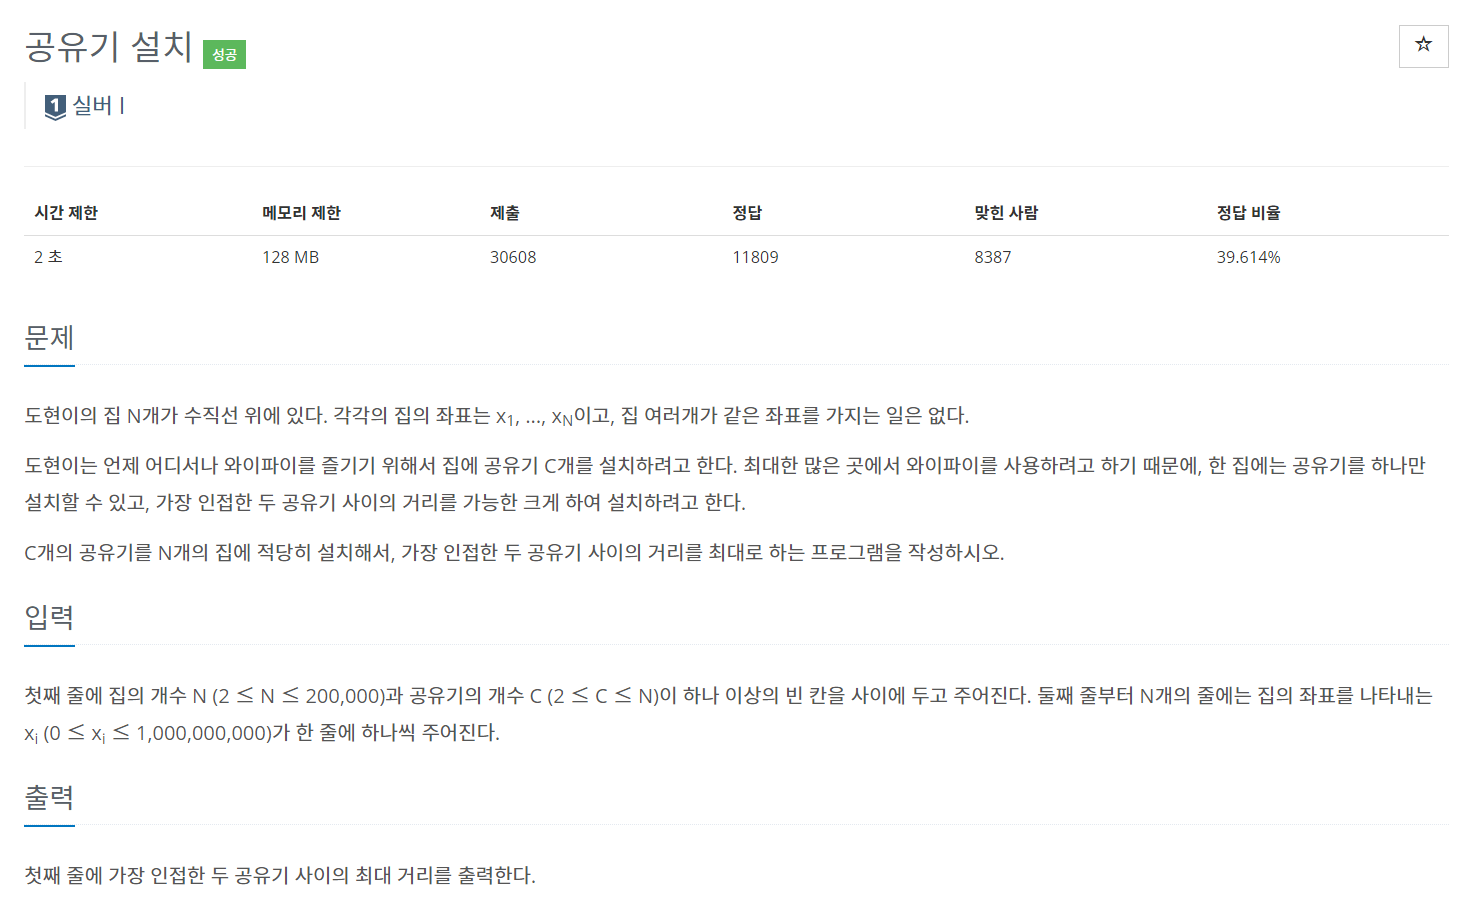

<!-- ![](image/2110.png) -->
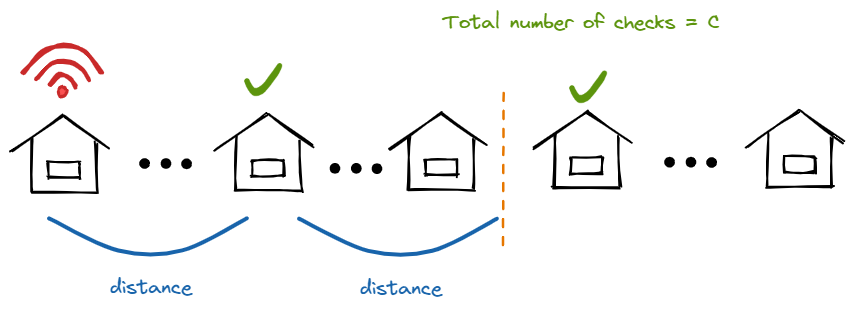

In [ ]:
import sys

sys.setrecursionlimit(200000)
input = sys.stdin.readline

In [ ]:
def setting(dist, idx, Count):
    if Count == 0:
        return True
    if idx >= N:
        return False
    s, e = idx+1, N-1
    f = -1
    while s <= e:
        mid = (s+e)//2
        if house[mid] >= house[idx]+dist:
            f = mid
            e = mid - 1
        else:
            s = mid + 1
    if f == -1:
        return False
    else:
        return setting(dist, f, Count-1)




N, C = map(int, input().split())
house = [int(input()) for _ in range(N)]
house.sort()

# Parametric Search (매개 변수 탐색)

### 1. 정답은 "매개 변수(Parameter)"로 만들고 Yes/No 문제(결정 문제)로 바꿔 보기  
### 2. 모든 값에 대해 Yes/No를 채웠다고 생각했을 때 정렬된 상태인가?  
### 3. Yes/No 결정하는 문제를 풀기  

[출처 : 호석님 강의 자료](https://github.com/rhs0266/FastCampus/blob/main/%EA%B0%95%EC%9D%98%20%EC%9E%90%EB%A3%8C/02-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/05~06-%EC%9D%B4%EB%B6%84%20%ED%83%90%EC%83%89/02-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-06-%EB%A7%A4%EA%B0%9C%20%EB%B3%80%EC%88%98%20%ED%83%90%EC%83%89.pdf)

이 문제에 적용한다면  
"어떤 거리가 있을 때 이 거리 이상의 간격을 갖는 공유기 c개 설치가 가능한가? "를 생각해보면 된다.  
가능한 거리 중 최대 값을 뽑아내면 된다.  
즉 가능한 최대 거리를 이분탐색으로 찾고 c개의 공유기 설치가 가능한 지를 찾는다.  

In [ ]:
# 공유기 사이의 최소 거리의 범위
L, R = 1, house[-1]-house[0]
ans = 1
while L <= R:
    dist = (L+R)//2
    # 최소 거리 만족하는 c개의 공유기 설치 가능 -> 최대 거리 찾기 위해서 더 늘려봄
    if setting(dist, 0, C-1):  # 첫 번째 집에 공유기 설치 -> 첫 번째 집에는 공유기를 설치하는 것이 이득이다.
        ans = dist
        L = dist + 1
    # 설치 불가능 -> 거리를 줄여야 한다.
    else:
        R = dist - 1

print(ans)

### 공유기 설치를 첫번째 집에 설치하는 이유를 두 가지 경우로 나누어 이해해보자

1. 공유기가 첫 번째 집에 설치된 경우
    - 공유기가 첫 번째 집에 설치된 상태에서 최소 거리를 만족하는 공유기 설치 성공 -> 문제 없음
    - C개의 공유기 설치 실패 -> 첫번째 집에 설치하지 않았으면 더 당연하게 설치 실패
2. 공유기가 첫 번째 집에 설치되지 않은 경우
    - 설치 성공 -> 가장 왼쪽 집에 설치해놓은 공유기를 첫번째 집에 옮겨도 문제 없음
    - 설치 실패 -> 마찬가지로 가장 왼쪽 공유기를 첫번째 집에 옮겨도 결과는 변동이 없고, 오히려 새로운 가능성이 생김.
    
◼ 첫 번째 공유기를 선택하지 않아야만 답인 경우도 있을까?  
&nbsp;ex ) 5개의 집에 4개의 공유기를 설치할 때 각 집의 위치가 [10, 100, 120, 150, 180]와 같다면?  
&nbsp;&nbsp;&nbsp;&nbsp;100, 120, 150, 180 인 경우에는 가장 인접한 공유기 최소 거리의 값이 20이고   
&nbsp;&nbsp;&nbsp;&nbsp;이 때 가장 왼쪽의 공유기 위치를 첫번째로 바뀌면 답이 바뀌는 거 아냐?라는 의문점이 순간 들 수도 있다.  
&nbsp;&nbsp;&nbsp;&nbsp;그러나 다시 한 번 생각해보자. **답이 바뀐다면 그게 애초에 답이 아니라는 소리다.**  
&nbsp;&nbsp;&nbsp;&nbsp;우리는 최소 거리의 최댓값을 답으로 찾고 있다.
